# Encoding the Audio

In [1]:
import sys 
import os 
import pickle 
import numpy as np
import spacy
import seaborn as sns
import matplotlib as plt 
import matplotlib.pyplot as plt 
import pandas as pd

sys.path.append(os.path.abspath("../lingpred_new/"))
from plotting import colours
from encoding_analysis import regress_out_one, make_arbitrary_static_vectors, brainscore_no_coef
from utils import get_words_onsets_offsets, get_indices_per_task, make_y_matrix_per_run, get_runs


In [2]:
dataset               = 'Armeni'
use_real_word_offsets = False

# dummy variables needed for that get_run functions
session = 1
subject = 1
task    = '0'

# Let's get X matrices for arbitrary vectors:
runs     = get_runs(dataset, session, subject, task)
words_df = pd.DataFrame() 

for run in runs:
    if len(runs)==1:
        words_df = get_words_onsets_offsets(dataset, subject=subject, session=session, run=run)
    else: 
        temp     = get_words_onsets_offsets(dataset, subject=subject, session=session, run=run)
        words_df = pd.concat([words_df, temp])
        
X        = make_arbitrary_static_vectors(words_df, dim=300)

# make an X matrix with residualised vectors
X_residualised = regress_out_one(X)
X.shape, X_residualised.shape


((8622, 300), (8621, 300))

In [3]:
# load the acoustic model:

if use_real_word_offsets:           
    with open('../audio/{}}/acoustic_model_8_mels_averaged_per_word_using_word_offsets.pkl'.format(dataset), 'rb') as f:
        acoustics = pickle.load(f)
else:   
    with open('../audio/{}/acoustic_model_8_mels_averaged_per_word_using_next_word_onset_as_offset.pkl'.format(dataset), 'rb') as f:
        acoustics = pickle.load(f)

acoustics.shape

(8622, 9)

In [4]:
'''
# Compute the indices for making the y matrix
# -------------------------------------------
# This is already saved under audio/Goldstein/indices_all_tasks.pkl
# No need to run this again, as this would take  approx. 10 min

indices = get_indices_per_task(dataset)
indices.shape

dir_path = '/Users/ines/research/Lingpred/audio/Goldstein/'
file_name = 'indices_all_tasks.pkl'
path      = dir_path + file_name

print(path)
f = open(path,"wb")
pickle.dump(indices, f)
f.close()

'''

# load the indices:
if dataset == 'Goldstein':
    with open('../audio/Goldstein/indices_all_tasks.pkl', 'rb') as f:
        indices = pickle.load(f)
if dataset == 'Armeni':
    with open('../audio/Armeni/indices_session_1.pkl', 'rb') as f:
        indices = pickle.load(f)


indices.shape

(8622, 157)

In [5]:
# check that they look alright:
indices[:1], indices[-1:]

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4]]),
 array([[8621, 8621, 8621, 8621, 8621, 8621, 8621, 8621, 8621, 8621, 8621,
         8621, 8621, 8621, 8621, 8621, 8621, 8621, 8621, 8621, 8621, 8621,
         8621, 8621, 8621, 8621, 8621, 8621, 8621, 8621, 8621, 8621, 8621,
         8621, 8621, 8621, 8621, 8621, 8621, 8621, 8621, 8621, 8621, 8621,
         8621, 8621, 8621, 8621, 8621, 8621, 8621, 8621, 8621, 8621, 8621,
         8621, 8621, 8621, 8621, 8621, 8621, 8621, 8621, 8621, 8621, 8621,
    

In [6]:
# use indices to make an acoustic y matrix of shape (length, 157, dim)
y_acoustics = make_y_matrix_per_run(acoustics, indices)
y_acoustics.shape

(8622, 157, 9)

In [7]:
y_acoustics[0, 0:10, 0] # check the first 9 values for the first timepoint/word

array([-3.18965149, -3.18965149, -3.18965149, -3.18965149, -3.18965149,
       -3.18965149, -3.18965149, -3.18965149, -3.18965149, -3.18965149])

In [8]:
words_df.head(9)


onset  duration        sample           type        word    offset
3   1.089189  0.129705  46637.372038  word_onset_01         THE  1.218895
6   1.218895  0.678458  46793.018296  word_onset_01  ADVENTURES  1.897353
15  1.897353  0.089796  47607.167956  word_onset_01          OF  1.987149
18  1.987149  0.488889  47714.923058  word_onset_01    SHERLOCK  2.476037
24  2.476037  0.698413  48301.589725  word_onset_01      HOLMES  3.174450
31  3.912772  0.149660  50025.671358  word_onset_01           A  4.062432
33  4.062432  0.698413  50205.263194  word_onset_01     SCANDAL  4.760845
43  4.940437  0.229478  51258.868636  word_onset_01          IN  5.169915
46  5.169915  0.558730  51534.242786  word_onset_01     BOHEMIA  5.728645

In [24]:
nlp     = spacy.load('en_core_web_lg')
X_Glove = np.vstack([nlp(word).vector for word in words_df.word]) # np array of shape (nr_words, 300)
PoS     = [nlp(word)[0].pos_ for word in words_df.word]
#X_Glove = np.array(X_Glove.get()) # transform from cupy to numpy array for stacking later on 


X_Glove_residualised = regress_out_one(X_Glove)
X_Glove.shape, X_Glove_residualised.shape
    

((8622, 300), (8621, 300))

In [10]:
# compute encoding for residual GloVe and arbitrary vectors:
y = y_acoustics[1:]
y = np.swapaxes(np.swapaxes(y, 0, 1), 0, 2)
print('y should be of shape: (nr_mels, nr_words, nr_timepoints')
print('y has shape ', y.shape)

encoding_arbitrary_residualised = brainscore_no_coef(X_residualised, y)
encoding_Glove_residualised     = brainscore_no_coef(X_Glove_residualised, y)

y should be of shape: (nr_mels, nr_words, nr_timepoints
y has shape  (9, 8621, 157)
We are now in the brainscore_no_coef method, and y has shape:
(9, 8621, 157)
We are now in the brainscore_no_coef method, and y has shape:
(9, 8621, 157)


In [11]:
# compute encoding for original GloVe and arbitrary vectors:
y = y_acoustics
y = np.swapaxes(np.swapaxes(y, 0, 1), 0, 2)
print('y should be of shape: (nr_mels, nr_words, nr_timepoints')
print('y has shape ', y.shape)

encoding_arbitrary = brainscore_no_coef(X, y)
encoding_Glove     = brainscore_no_coef(X_Glove, y)

y should be of shape: (nr_mels, nr_words, nr_timepoints
y has shape  (9, 8622, 157)
We are now in the brainscore_no_coef method, and y has shape:
(9, 8622, 157)
We are now in the brainscore_no_coef method, and y has shape:
(9, 8622, 157)


In [12]:
if dataset == 'Goldstein':  
    with open('../audio/Goldstein/X_GPT_original_and_residualised_layer_47.pkl', 'rb') as f:
        X_matrices_GPT = pickle.load(f)
if dataset == 'Armeni':
    with open('../audio/Armeni/X_y_matrices_Glove_GPT_arbitrary_session_1.pkl', 'rb') as f:
        X_matrices_GPT = pickle.load(f)
X_matrices_GPT.keys()

dict_keys(['y_Glove', 'X_Glove', 'y_GPT', 'X_GPT', 'y_arbitrary', 'X_arbitrary'])

In [13]:
if dataset == 'Armeni':
    X_GPT              = X_matrices_GPT['X_GPT']
    X_GPT_residualised = regress_out_one(X_GPT)
if dataset == 'Goldstein':
    X_GPT              = X_matrices_GPT['X_GPT_layer_47']
    X_GPT_residualised = X_matrices_GPT['X_GPT_residualised_layer_47']


In [14]:
# compute encoding for GPT both regressed out and original GPT:
y = y_acoustics
y = np.swapaxes(np.swapaxes(y, 0, 1), 0, 2)

encoding_GPT  = brainscore_no_coef(X_GPT, y)

y                         = np.swapaxes(np.swapaxes(y_acoustics[1:], 0, 1), 0, 2)
encoding_GPT_residualised = brainscore_no_coef(X_GPT_residualised, y)

We are now in the brainscore_no_coef method, and y has shape:
(9, 8622, 157)
We are now in the brainscore_no_coef method, and y has shape:
(9, 8621, 157)


In [15]:
# Let's save the results with original vectors in one file:
directory = '../audio/{}/'.format(dataset)
file_name = 'vectors_GPT_Glove_arbitrary_y_matrix_like_selfpred.pkl'
path      = directory + file_name
print(path)

keys    = ['corr_GPT', 'corr_Glove', 'corr_arbitrary']
values  = [encoding_GPT, encoding_Glove, encoding_arbitrary]
results = dict(zip(keys, values))

f = open(path,"wb")
pickle.dump(results, f)
f.close()


# Let's save the regressed out result in one file:
directory = '../audio/{}/'.format(dataset)
file_name = 'regressed_out_vectors_Glove_arbitrary_y_matrix_like_selfpred.pkl'
path      = directory + file_name
print(path)

keys    = ['corr_GPT','corr_Glove', 'corr_arbitrary']
values  = [encoding_GPT_residualised, encoding_Glove_residualised, encoding_arbitrary_residualised]
res_results = dict(zip(keys, values))

f = open(path,"wb")
pickle.dump(res_results, f)
f.close()

../audio/Armeni/vectors_GPT_Glove_arbitrary_y_matrix_like_selfpred.pkl
../audio/Armeni/regressed_out_vectors_Glove_arbitrary_y_matrix_like_selfpred.pkl


## Plots

In [19]:
from plotting import times_100, lowerCI, upperCI, reshape

Text(0.5, 1.0, 'Armeni:')

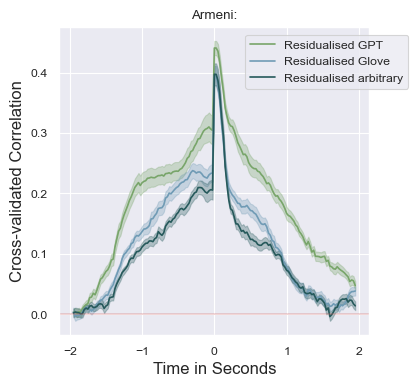

In [21]:
# get model names
models = [k.split(sep='_')[1] for k in results.keys()]
labels = ['Residualised ' + m for m in models]
    
    
fig, (ax1) = plt.subplots(1, 1, figsize=(4, 4))

for i, key in enumerate(res_results.keys()):
    ax1.plot(times_100, res_results[key].mean(axis=0).mean(axis=0), c=colours[models[i]], label=labels[i])   
    ax1.fill_between(times_100, lowerCI(reshape(res_results[key])), 
                                upperCI(reshape(res_results[key])), color=colours[models[i]], alpha=0.3)

ax1.legend(loc=(0.6,0.8))
#ax1.set_ylim([-0.005, 0.05])
ax1.set_xlabel('Time in Seconds', fontsize=12)
ax1.set_ylabel('Cross-validated Correlation', fontsize=12)
ax1.axhline(c='indianred',  alpha=0.3)
ax1.set_title(dataset+':')

Text(0.5, 1.0, 'Armeni:')

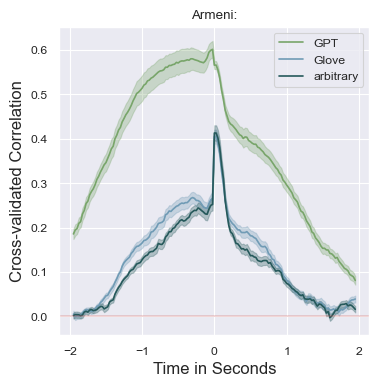

In [22]:
# get model names
models = [k.split(sep='_')[1] for k in res_results.keys()]
labels = [m for m in models]
    
    
fig, (ax1) = plt.subplots(1, 1, figsize=(4, 4))

for i, key in enumerate(results.keys()):
    ax1.plot(times_100, results[key].mean(axis=0).mean(axis=0), c=colours[models[i]], label=labels[i])   
    ax1.fill_between(times_100, lowerCI(reshape(results[key])), 
                                upperCI(reshape(results[key])), color=colours[models[i]], alpha=0.3)

ax1.legend()
#ax1.set_ylim([-0.005, 0.05])
ax1.set_xlabel('Time in Seconds', fontsize=12)
ax1.set_ylabel('Cross-validated Correlation', fontsize=12)
ax1.axhline(c='indianred',  alpha=0.3)
ax1.set_title(dataset+':' )

### Histogram of the difference in values when encoding from residualised vs. original vectors

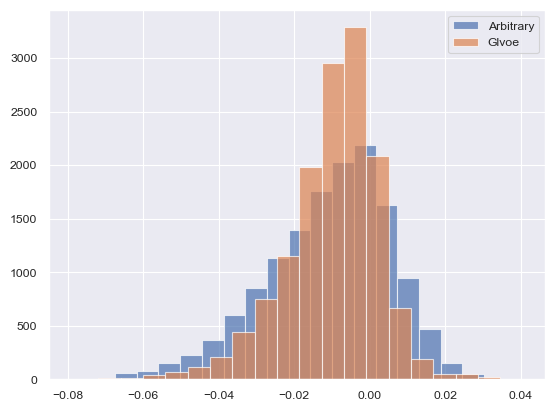

In [18]:
diff = encoding_arbitrary_residualised - encoding_arbitrary
diff.flatten().shape
plt.hist(diff.flatten(), bins=20, alpha=0.7, label='Arbitrary')
diff = encoding_Glove_residualised - encoding_Glove
diff.flatten().shape
plt.hist(diff.flatten(), bins=20, alpha=0.7, label='Glvoe')
plt.legend()

### Arbitrary encoding: Residualised vs. Orignial vectors

Text(0.5, 1.0, 'Armeni: arbitrary')

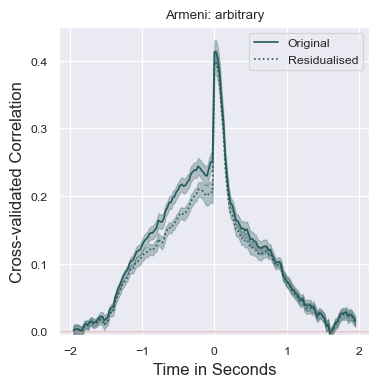

In [23]:
# get model names
models = ['arbitrary', 'arbitrary']
labels = ['Original', 'Residualised']
linestyles = {'Original': '-', 'Residualised': ':'}
    
    
fig, (ax1) = plt.subplots(1, 1, figsize=(4, 4))

for i, key in enumerate([encoding_arbitrary, encoding_arbitrary_residualised]):
    ax1.plot(times_100, key.mean(axis=0).mean(axis=0), c=colours[models[i]], label=labels[i], linestyle=linestyles[labels[i]])   
    ax1.fill_between(times_100, lowerCI(reshape(key)), 
                                upperCI(reshape(key)), color=colours[models[i]], alpha=0.3)

ax1.legend()
ax1.set_ylim([-0.005, 0.45])
ax1.set_xlabel('Time in Seconds', fontsize=12)
ax1.set_ylabel('Cross-validated Correlation', fontsize=12)
ax1.axhline(c='indianred',  alpha=0.3)
ax1.set_title(dataset+': ' + models[0])

### GloVe encoding: Residualised vs. Original Vectors 

Text(0.5, 1.0, 'Armeni: Glove')

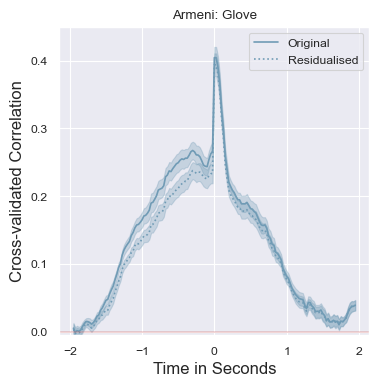

In [24]:
# get model names
models = ['Glove', 'Glove']
labels = ['Original', 'Residualised']
linestyles = {'Original': '-', 'Residualised': ':'}
    
    
fig, (ax1) = plt.subplots(1, 1, figsize=(4, 4))

for i, key in enumerate([encoding_Glove, encoding_Glove_residualised]):
    ax1.plot(times_100, key.mean(axis=0).mean(axis=0), c=colours[models[i]], label=labels[i], linestyle=linestyles[labels[i]])   
    ax1.fill_between(times_100, lowerCI(reshape(key)), 
                                upperCI(reshape(key)), color=colours[models[i]], alpha=0.3)

ax1.legend()
ax1.set_ylim([-0.005, 0.45])
ax1.set_xlabel('Time in Seconds', fontsize=12)
ax1.set_ylabel('Cross-validated Correlation', fontsize=12)
ax1.axhline(c='indianred',  alpha=0.3)
ax1.set_title(dataset+': ' + models[0])

Text(0.5, 1.0, 'Armeni: GPT')

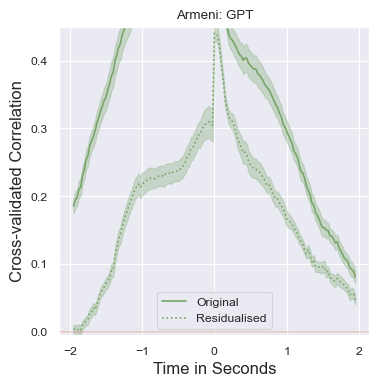

In [25]:
# get model names
models = ['GPT', 'GPT']
labels = ['Original', 'Residualised']
linestyles = {'Original': '-', 'Residualised': ':'}
    
    
fig, (ax1) = plt.subplots(1, 1, figsize=(4, 4))

for i, key in enumerate([encoding_GPT, encoding_GPT_residualised]):
    ax1.plot(times_100, key.mean(axis=0).mean(axis=0), c=colours[models[i]], label=labels[i], linestyle=linestyles[labels[i]])   
    ax1.fill_between(times_100, lowerCI(reshape(key)), 
                                upperCI(reshape(key)), color=colours[models[i]], alpha=0.3)

ax1.legend()
ax1.set_ylim([-0.005, 0.45])
ax1.set_xlabel('Time in Seconds', fontsize=12)
ax1.set_ylabel('Cross-validated Correlation', fontsize=12)
ax1.axhline(c='indianred',  alpha=0.3)
ax1.set_title(dataset+': ' + models[0])

## Difference of Predictability on encoding 

In [16]:
with open('../audio/Armeni/Dataframe_WordSurprisal_Top10Words_All_Sessions.pkl', 'rb') as f:
    df = pickle.load(f)
df

Word_from_BPE Word_in_Annotation  Probability  Surprisal  is_Top_1  \
0               THE                THE     0.000001  13.512426      True   
1               ADV         ADVENTURES     0.000685   7.285918     False   
2                OF                 OF     0.882994   0.124437      True   
3                SH           SHERLOCK     0.006021   5.112506     False   
4               HOL             HOLMES     0.794207   0.230411      True   
...             ...                ...          ...        ...       ...   
85714          away               AWAY     0.993407   0.006615      True   
85715         these              THESE     0.013016   4.341609     False   
85716         bleak              BLEAK     0.000391   7.846440     False   
85717        autumn           AUTUMNAL     0.059151   2.827660     False   
85718      evenings           EVENINGS     0.169370   1.775670     False   

      is_Top_10  Session_ID  Trial_in_Session  \
0          True           1                 0   
1         False           1                 1   
2          True           1                 2   
3         False           1                 3   
4          True           1                 4   
...         ...         ...               ...   
85714      True          10              8183   
85715      True          10              8184   
85716     False          10              8185   
85717      True          10              8186   
85718      True          10              8187   

                                            Top_10_Words  \
0             [The, In, A, I, This, It, But, If, We, As]   
1           [ M,  SEC,  CH,  S,  F,  A,  B,  T,  AN,  C]   
2      [ OF,  IN,  of,  AND,  THAT,  ARE,  FROM,  CON...   
3             [ THE,  B,  L,  H,  A,  M,  S,  K,  T,  R]   
4      [ HOL,  Holmes,  B,  AND,  H,  P,  PR,  G,  BE...   
...                                                  ...   
85714  [ away, away,  the,  our,  we,  still,  it,  A...   
85715  [ the,  an,  our,  a,  this,  that,  these,  m...   
85716  [ few,  hours,  long,  last,  days,  lonely,  ...   
85717  [ days,  hours,  and,  winter,  autumn,  month...   
85718  [ days,  hours,  evenings,  months,  nights,  ...   

                                            Top_10_Probs  is_Top_5  is_Top_3  
0      [0.0389113575220108, 0.010543630458414555, 0.0...      True      True  
1      [0.014792617410421371, 0.013728495687246323, 0...     False     False  
2      [0.8829938769340515, 0.021373802796006203, 0.0...      True      True  
3      [0.11832969635725021, 0.022486736997961998, 0....     False     False  
4      [0.7942072153091431, 0.05257217213511467, 0.01...      True      True  
...                                                  ...       ...       ...  
85714  [0.9934067726135254, 0.0011359768686816096, 0....      True      True  
85715  [0.581264078617096, 0.1043514609336853, 0.0978...     False     False  
85716  [0.18279755115509033, 0.09013864398002625, 0.0...     False     False  
85717  [0.17442023754119873, 0.12977533042430878, 0.1...     False     False  
85718  [0.3305557668209076, 0.2955707907676697, 0.169...      True      True  

[85719 rows x 12 columns]

In [17]:
if dataset == 'Goldstein':
    df = pd.read_csv('../Goldstein_gpt_features/transcript_data_gpt.txt', 
                                sep='\t',
                                index_col='Unnamed: 0')
    # first we only want to keep the word-initial token of a word:
    mask_first = df["word_idx"] != df["word_idx"].shift(1)
    df_first   = df[mask_first]

    is_top_1     = [x < 1 for x in df_first['rank']] # rank 0 is the Top-1 prediction
    is_not_top_1 = [not x for x in is_top_1]
    is_top_5     = [x < 5 for x in df_first['rank']] # rank 4 is the Top-5 prediction
    is_not_top_5 = [not x for x in is_top_5]

if dataset == 'Armeni':
    with open('../audio/Armeni/Dataframe_WordSurprisal_Top10Words_All_Sessions.pkl', 'rb') as f:
        df = pickle.load(f)
    is_top_1 = df.is_Top_1.to_list()[:X_GPT.shape[0]]
    is_not_top_1 = [not x for x in is_top_1]
    is_top_5     = df.is_Top_5.to_list()[:X_GPT.shape[0]]
    is_not_top_5 = [not x for x in is_top_5]

print(np.unique(is_top_1, return_counts=True))
print(np.unique(is_top_5, return_counts=True))

(array([False,  True]), array([5547, 3075]))
(array([False,  True]), array([3568, 5054]))


In [18]:
'''Alternative way of defining Top-1 and Top-5 for Goldstein '''

if dataset == 'Goldstein':
    # group by word_idx
    groups = df.groupby("word_idx")

    # condition: for each word_idx, check if ALL ranks are 0
    mask_all_zero = groups["rank"].transform(lambda x: (x == 0).all())
    mask_all_less_5 = groups["rank"].transform(lambda x: (x < 5).all())  

    len(mask_all_zero[mask_first])
    np.unique(mask_all_zero[mask_first], return_counts=True), np.unique(mask_all_less_5[mask_first], return_counts=True)

This means we have 1485 trials in which the word-initial token is the Top-1 predictions and 2604 trials for which it is among the Top-5 predictions

In [19]:
y_acoustics.shape, X_Glove_residualised.shape, len(is_top_1)

((8622, 157, 9), (8621, 300), 8622)

### First for the original vectors:

In [20]:
y = y_acoustics

X_Glove_top_1     = X_Glove[is_top_1]
X_Glove_top_5     = X_Glove[is_top_5]
X_Glove_not_top_1 = X_Glove[is_not_top_1]
X_Glove_not_top_5 = X_Glove[is_not_top_5]

y_top_1     = y[is_top_1]
y_top_5     = y[is_top_5]
y_not_top_1 = y[is_not_top_1]
y_not_top_5 = y[is_not_top_5]

y_top_1 = np.swapaxes(np.swapaxes(y_top_1, 1, 2), 0, 1)
y_top_5 = np.swapaxes(np.swapaxes(y_top_5, 1, 2), 0, 1)
y_not_top_1 = np.swapaxes(np.swapaxes(y_not_top_1, 1, 2), 0, 1)
y_not_top_5 = np.swapaxes(np.swapaxes(y_not_top_5, 1, 2), 0, 1)

In [21]:
# compute the encoding of the acoustics for each split
encoding_Glove_top_1     = brainscore_no_coef(X_Glove_top_1, y_top_1)
encoding_Glove_top_5     = brainscore_no_coef(X_Glove_top_5, y_top_5)
encoding_Glove_not_top_1 = brainscore_no_coef(X_Glove_not_top_1, y_not_top_1)
encoding_Glove_not_top_5 = brainscore_no_coef(X_Glove_not_top_5, y_not_top_5)

We are now in the brainscore_no_coef method, and y has shape:
(9, 3075, 157)
We are now in the brainscore_no_coef method, and y has shape:
(9, 5054, 157)
We are now in the brainscore_no_coef method, and y has shape:
(9, 5547, 157)
We are now in the brainscore_no_coef method, and y has shape:
(9, 3568, 157)


### and now for the residualised ones:

In [37]:
# Since we are working with residualised vectors, which is not defined for the first word, we need to drop that for our is_top_ masks
y = y_acoustics[1:]

is_top_1     = is_top_1[1:]
is_top_5     = is_top_5[1:]
is_not_top_1 = is_not_top_1[1:]
is_not_top_5 = is_not_top_5[1:]

len(is_top_1), len(is_top_5), len(is_not_top_1), len(is_not_top_5), y.shape

(8621, 8621, 8621, 8621, (8621, 157, 9))

In [38]:
y_top_1     = y[is_top_1]
y_top_5     = y[is_top_5]
y_not_top_1 = y[is_not_top_1]
y_not_top_5 = y[is_not_top_5]

X_Glove_residualised_top_1     = X_Glove_residualised[is_top_1]
X_Glove_residualised_top_5     = X_Glove_residualised[is_top_5]
X_Glove_residualised_not_top_1 = X_Glove_residualised[is_not_top_1]
X_Glove_residualised_not_top_5 = X_Glove_residualised[is_not_top_5]

y_top_1.shape, X_Glove_residualised_top_1.shape

((3074, 157, 9), (3074, 300))

In [39]:
y_top_1 = np.swapaxes(np.swapaxes(y_top_1, 1, 2), 0, 1)
y_top_5 = np.swapaxes(np.swapaxes(y_top_5, 1, 2), 0, 1)
y_not_top_1 = np.swapaxes(np.swapaxes(y_not_top_1, 1, 2), 0, 1)
y_not_top_5 = np.swapaxes(np.swapaxes(y_not_top_5, 1, 2), 0, 1)

In [40]:
# compute the encoding of the acoustics for each split
encoding_Glove_residualised_top_1     = brainscore_no_coef(X_Glove_residualised_top_1, y_top_1)
encoding_Glove_residualised_top_5     = brainscore_no_coef(X_Glove_residualised_top_5, y_top_5)
encoding_Glove_residualised_not_top_1 = brainscore_no_coef(X_Glove_residualised_not_top_1, y_not_top_1)
encoding_Glove_residualised_not_top_5 = brainscore_no_coef(X_Glove_residualised_not_top_5, y_not_top_5)

We are now in the brainscore_no_coef method, and y has shape:
(9, 3074, 157)
We are now in the brainscore_no_coef method, and y has shape:
(9, 5053, 157)
We are now in the brainscore_no_coef method, and y has shape:
(9, 5547, 157)
We are now in the brainscore_no_coef method, and y has shape:
(9, 3568, 157)


Text(0.5, 1.0, 'Armeni Audio Encoding from Residual Vectors: Top 1')

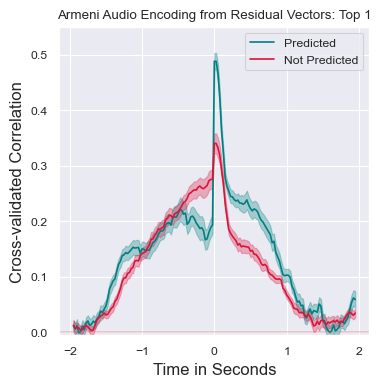

In [43]:
# get model names
models = ['Top 1', 'Not Predicted']
labels = ['Predicted', 'Not Predicted']
    
    
fig, (ax1) = plt.subplots(1, 1, figsize=(4, 4))

for i, key in enumerate([encoding_Glove_residualised_top_1, encoding_Glove_residualised_not_top_1]):
    ax1.plot(times_100, key.mean(axis=0).mean(axis=0), c=colours[models[i]], label=labels[i])   
    ax1.fill_between(times_100, lowerCI(reshape(key)), 
                                upperCI(reshape(key)), color=colours[models[i]], alpha=0.3)

ax1.legend()
ax1.set_ylim([-0.005, 0.55])
ax1.set_xlabel('Time in Seconds', fontsize=12)
ax1.set_ylabel('Cross-validated Correlation', fontsize=12)
ax1.axhline(c='indianred',  alpha=0.3)
ax1.set_title(dataset+' Audio Encoding from Residual Vectors: ' + models[0])

Text(0.5, 1.0, 'Armeni Audio Encoding: Original Vectors Top 1')

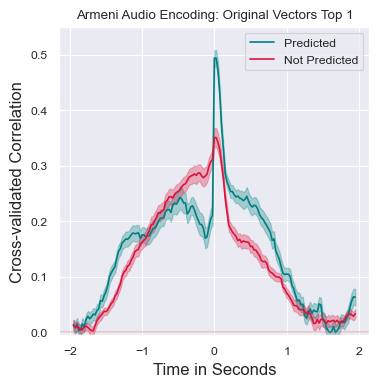

In [45]:
# get model names
models = ['Top 1', 'Not Predicted']
labels = ['Predicted', 'Not Predicted']
    
    
fig, (ax1) = plt.subplots(1, 1, figsize=(4, 4))

for i, key in enumerate([encoding_Glove_top_1, encoding_Glove_not_top_1]):
    ax1.plot(times_100, key.mean(axis=0).mean(axis=0), c=colours[models[i]], label=labels[i])   
    ax1.fill_between(times_100, lowerCI(reshape(key)), 
                                upperCI(reshape(key)), color=colours[models[i]], alpha=0.3)

ax1.legend()
ax1.set_ylim([-0.005, 0.55])
ax1.set_xlabel('Time in Seconds', fontsize=12)
ax1.set_ylabel('Cross-validated Correlation', fontsize=12)
ax1.axhline(c='indianred',  alpha=0.3)
ax1.set_title(dataset+' Audio Encoding: Original Vectors ' + models[0])

Text(0.5, 1.0, 'Armeni Audio Encoding: ResidualTop 5')

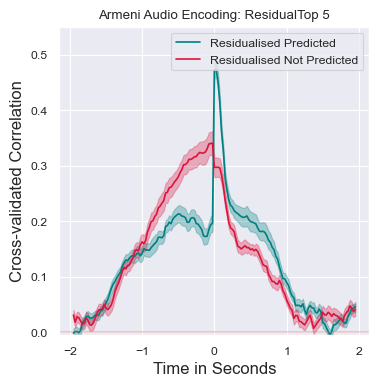

In [46]:
# get model names
models = ['Top 5', 'Not Predicted']
labels = ['Predicted', 'Not Predicted']
    
    
fig, (ax1) = plt.subplots(1, 1, figsize=(4, 4))

for i, key in enumerate([encoding_Glove_residualised_top_5, encoding_Glove_residualised_not_top_5]):
    ax1.plot(times_100, key.mean(axis=0).mean(axis=0), c=colours[models[i]], label='Residualised ' +labels[i])   
    ax1.fill_between(times_100, lowerCI(reshape(key)), 
                                upperCI(reshape(key)), color=colours[models[i]], alpha=0.3)

ax1.legend()
ax1.set_ylim([-0.005, 0.55])
ax1.set_xlabel('Time in Seconds', fontsize=12)
ax1.set_ylabel('Cross-validated Correlation', fontsize=12)
ax1.axhline(c='indianred',  alpha=0.3)
ax1.set_title(dataset+' Audio Encoding: Residual' + models[0])

### Look at the PoS distribution in each split

In [50]:
len(PoS), len(words_df), len(is_top_1)

(8622, 8622, 8621)

In [51]:
if dataset == 'Goldstein':
    df = pd.read_csv('../Goldstein_gpt_features/transcript_data_gpt.txt', 
                                sep='\t',
                                index_col='Unnamed: 0')
    # first we only want to keep the word-initial token of a word:
    mask_first = df["word_idx"] != df["word_idx"].shift(1)
    df_first   = df[mask_first]

    is_top_1     = [x < 1 for x in df_first['rank']] # rank 0 is the Top-1 prediction
    is_not_top_1 = [not x for x in is_top_1]
    is_top_5     = [x < 5 for x in df_first['rank']] # rank 4 is the Top-5 prediction
    is_not_top_5 = [not x for x in is_top_5]

if dataset == 'Armeni':
    with open('../audio/Armeni/Dataframe_WordSurprisal_Top10Words_All_Sessions.pkl', 'rb') as f:
        df = pickle.load(f)
    is_top_1 = df.is_Top_1.to_list()[:X_GPT.shape[0]]
    is_not_top_1 = [not x for x in is_top_1]
    is_top_5     = df.is_Top_5.to_list()[:X_GPT.shape[0]]
    is_not_top_5 = [not x for x in is_top_5]

print(np.unique(is_top_1, return_counts=True))
print(np.unique(is_top_5, return_counts=True))

(array([False,  True]), array([5547, 3075]))
(array([False,  True]), array([3568, 5054]))


In [52]:
PoS_top_1     = np.array(PoS)[is_top_1]
PoS_not_top_1 = np.array(PoS)[is_not_top_1]

len(PoS_top_1), len(PoS_not_top_1)

(3075, 5547)

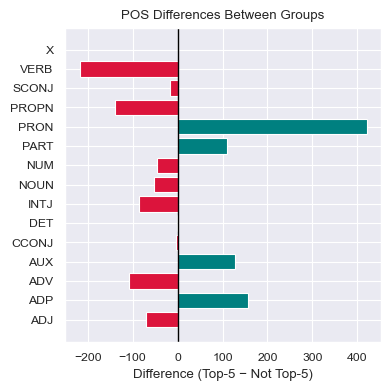

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Count frequencies
counts_top1 = Counter(PoS_top_1)
counts_not_top1 = Counter(PoS_not_top_1)

# Union of all POS tags
all_tags = sorted(set(counts_top1.keys()) | set(counts_not_top1.keys()))

# Align counts
top1_vals = np.array([counts_top1.get(tag, 0) for tag in all_tags])
not_top1_vals = np.array([counts_not_top1.get(tag, 0) for tag in all_tags])

# Option 1: difference in counts
diff_vals = top1_vals - not_top1_vals

# Option 2: difference in proportions (uncomment if you prefer)
# top1_vals = top1_vals / top1_vals.sum()
# not_top1_vals = not_top1_vals / not_top1_vals.sum()
# diff_vals = top1_vals - not_top1_vals

# Plot
y = np.arange(len(all_tags))

plt.figure(figsize=(4, 4))
bars = plt.barh(y, diff_vals, color=["teal" if v > 0 else "crimson" for v in diff_vals])

plt.yticks(y, all_tags)
plt.axvline(0, color="black", linewidth=1)
plt.xlabel("Difference (Top-5 − Not Top-5)")
plt.title("POS Differences Between Groups")
plt.tight_layout()
plt.show()


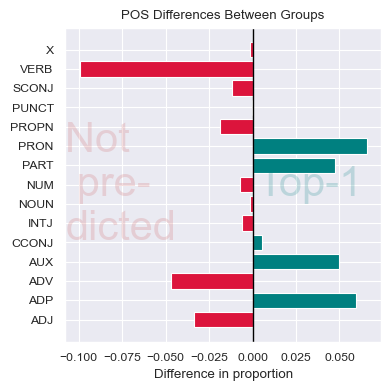

In [53]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Count frequencies
counts_top1     = Counter(PoS_top_1)
counts_not_top1 = Counter(PoS_not_top_1)

# Union of all POS tags
all_tags = sorted(set(counts_top1.keys()) | set(counts_not_top1.keys()))

# Align counts
top1_vals = np.array([counts_top1.get(tag, 0) for tag in all_tags])
not_top1_vals = np.array([counts_not_top1.get(tag, 0) for tag in all_tags])

# Normalise to proportions
top1_vals     = top1_vals / top1_vals.sum()
not_top1_vals = not_top1_vals / not_top1_vals.sum()
diff_vals     = top1_vals - not_top1_vals

# Plot
y       = np.arange(len(all_tags))
fig, ax = plt.subplots(figsize=(4, 4))

ax.barh(y, diff_vals, color=["teal" if v > 0 else "crimson" for v in diff_vals])

ax.set_yticks(y)
ax.set_yticklabels(all_tags)
ax.axvline(0, color="black", linewidth=1)

ax.set_xlabel("Difference in proportion")
ax.set_title("POS Differences Between Groups")

# Get limits
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Add background text
ax.text(xlim[1]*0.85, (ylim[0]+ylim[1])/2, "Top-1",
        ha="right", va="center", fontsize=30, color="teal", alpha=0.2, rotation=0)
ax.text(xlim[0]*1, (ylim[0]+ylim[1])/2, "Not \n pre- \ndicted",
        ha="left", va="center", fontsize=30, color="indianred", alpha=0.2, rotation=0)

plt.tight_layout()
plt.show()


In [54]:
if dataset == 'Goldstein':
    words_df['duration'] = words_df.end - words_df.onset
words_df

onset  duration        sample           type        word  \
3        1.089189  0.129705  4.663737e+04  word_onset_01         THE   
6        1.218895  0.678458  4.679302e+04  word_onset_01  ADVENTURES   
15       1.897353  0.089796  4.760717e+04  word_onset_01          OF   
18       1.987149  0.488889  4.771492e+04  word_onset_01    SHERLOCK   
24       2.476037  0.698413  4.830159e+04  word_onset_01      HOLMES   
...           ...       ...           ...            ...         ...   
41115  425.853815  0.548753  5.577619e+06  word_onset_07  HONOURABLE   
41123  426.402568  0.838095  5.578278e+06  word_onset_07       TITLE   
41131  428.058804  0.089796  5.580265e+06  word_onset_07          OF   
41134  428.148600  0.419048  5.580373e+06  word_onset_07         THE   
41139  431.650641  1.765986  5.584576e+06  word_onset_07       WOMAN   

           offset  
3        1.218895  
6        1.897353  
15       1.987149  
18       2.476037  
24       3.174450  
...           ...  
41115  426.402568  
41123  427.240663  
41131  428.148600  
41134  428.567647  
41139  433.416627  

[8622 rows x 6 columns]

In [55]:
print(words_df[is_top_1].duration.mean(), words_df[is_top_1].duration.var())
print(words_df[is_not_top_1].duration.mean(), words_df[is_not_top_1].duration.var())


0.22931946978707637 0.02772627521099224
0.3070882628640193 0.03511334888635475


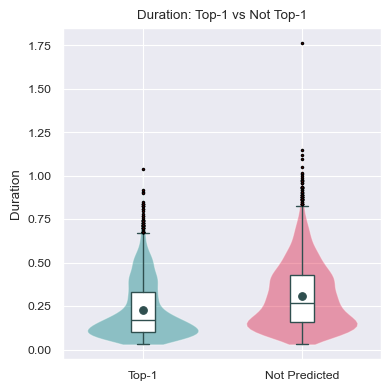

In [57]:
import matplotlib.pyplot as plt
import numpy as np

dur_top1 = words_df[is_top_1].duration.values
dur_not_top1 = words_df[is_not_top_1].duration.values

data = [dur_top1, dur_not_top1]
labels = ["Top-1", "Not Predicted"]

fig, ax = plt.subplots(figsize=(4,4))

for i, vals in enumerate(data, start=1):
    # violin
    parts = ax.violinplot(vals, positions=[i], showextrema=False, widths=0.7)
    for pc in parts['bodies']:
        pc.set_facecolor("teal" if i==1 else "crimson")
        pc.set_alpha(0.4)
    
    # boxplot
    box = ax.boxplot(vals, positions=[i], widths=0.15, patch_artist=True,
                     boxprops=dict(facecolor="white", color="darkslategrey"),
                     medianprops=dict(color="darkslategrey"),
                     whiskerprops=dict(color="darkslategrey"),
                     capprops=dict(color="darkslategrey"),
                     flierprops = dict(
                                        marker=".",
                                        markersize=3,
                                        markerfacecolor="red",
                                        linestyle="none"
                    ))
    
    # mean as a dot
    ax.scatter(i, np.mean(vals), color="darkslategrey", zorder=3, s=30)

ax.set_xticks([1,2])
ax.set_xticklabels(labels)
ax.set_ylabel("Duration")
ax.set_title("Duration: Top-1 vs Not Top-1")
plt.tight_layout()
plt.show()


### For each split, look at what type of words are in the pre-onset interval

In [58]:
preonset_indices = indices[:,:78]
preonset_indices.shape

(8622, 78)

In [59]:
preonset_indices_top_1     = preonset_indices[is_top_1]
preonset_indices_not_top_1 = preonset_indices[is_not_top_1]
nr_words_preonset_top_1     = [len(np.unique(x)) for x in preonset_indices_top_1]
nr_words_preonset_not_top_1 = [len(np.unique(x)) for x in preonset_indices_not_top_1]

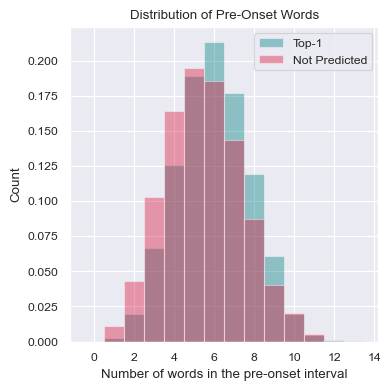

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.hist(nr_words_preonset_top_1, bins=range(0, max(max(nr_words_preonset_top_1),
                                                    max(nr_words_preonset_not_top_1))+2),
         density=True, alpha=0.4, label="Top-1", color="teal", align="left")
plt.hist(nr_words_preonset_not_top_1, bins=range(0, max(max(nr_words_preonset_top_1),
                                                        max(nr_words_preonset_not_top_1))+2),
         density=True, alpha=0.4, label="Not Predicted", color="crimson", align="left")

plt.xlabel("Number of words in the pre-onset interval")
plt.ylabel("Count")
plt.title("Distribution of Pre-Onset Words")
plt.legend()
plt.tight_layout()
plt.show()


In [62]:
words_preonset_top_1     = [words_df.word.iloc[x] for x in preonset_indices_top_1.flatten()]
words_preonset_not_top_1 = [words_df.word.iloc[x] for x in preonset_indices_not_top_1.flatten()]

In [63]:
PoS_preonset_top_1     = [nlp(word)[0].pos_ for word in words_preonset_top_1]
PoS_preonset_not_top_1 = [nlp(word)[0].pos_ for word in words_preonset_not_top_1]


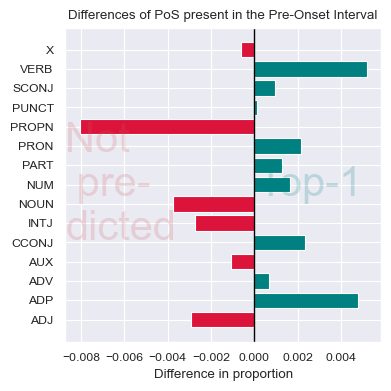

In [65]:
# Count frequencies
counts_top1 = Counter(PoS_preonset_top_1)
counts_not_top1 = Counter(PoS_preonset_not_top_1)

# Union of all POS tags
all_tags = sorted(set(counts_top1.keys()) | set(counts_not_top1.keys()))

# Align counts
top1_vals     = np.array([counts_top1.get(tag, 0) for tag in all_tags])
not_top1_vals = np.array([counts_not_top1.get(tag, 0) for tag in all_tags])

# Normalise to proportions
top1_vals     = top1_vals / top1_vals.sum()
not_top1_vals = not_top1_vals / not_top1_vals.sum()
diff_vals     = top1_vals - not_top1_vals

# Plot
y       = np.arange(len(all_tags))
fig, ax = plt.subplots(figsize=(4, 4))

ax.barh(y, diff_vals, color=["teal" if v > 0 else "crimson" for v in diff_vals])

ax.set_yticks(y)
ax.set_yticklabels(all_tags)
ax.axvline(0, color="black", linewidth=1)

ax.set_xlabel("Difference in proportion")
ax.set_title("Differences of PoS present in the Pre-Onset Interval")

# Get limits
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Add background text
ax.text(xlim[1]*0.85, (ylim[0]+ylim[1])/2, "Top-1",
        ha="right", va="center", fontsize=30, color="teal", alpha=0.2, rotation=0)
ax.text(xlim[0]*1, (ylim[0]+ylim[1])/2, "Not \n pre- \ndicted",
        ha="left", va="center", fontsize=30, color="indianred", alpha=0.2, rotation=0)

plt.tight_layout()
plt.show()


In [66]:
# Let's look at the acoustics themselves, do they look very different??
y_top_1.shape, y_not_top_1.shape

((9, 3074, 157), (9, 5547, 157))

In [67]:
preonset_y_top_1, preonset_y_not_top_1 = y_top_1[:,:,:78], y_not_top_1[:,:,:78]
preonset_y_top_1.shape, preonset_y_not_top_1.shape

((9, 3074, 78), (9, 5547, 78))

In [68]:
preonset_y_top_1[:, 0, 0]

array([ -3.18965149, -16.83115768, -30.60241699, -20.08598518,
       -21.69374657, -32.22709274, -44.04509735, -48.29707336,
       370.1706543 ])

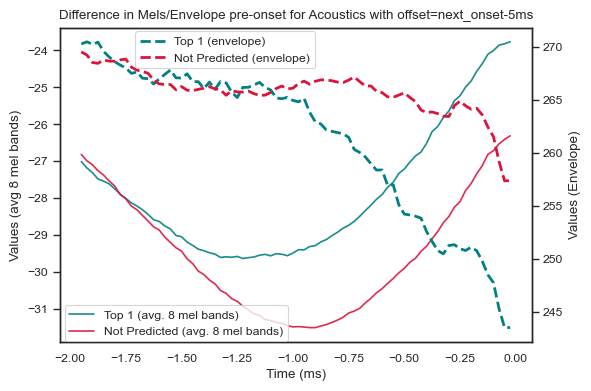

In [77]:

x = times_100[:78]
sns.set_style('white')

fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx()  # right y-axis

colors = ['teal', 'crimson']
labels = ['Top 1', 'Not Predicted']

for data, color, label in zip([preonset_y_top_1, preonset_y_not_top_1],
                              colors, labels):
    mean = data.mean(axis=1)  # shape (9, 78)
    std = data.std(axis=1)

    # --- Average across first 8 ---
    avg_mean = mean[:8].mean(axis=0)
    avg_std = mean[:8].std(axis=0)

    ax1.plot(x, avg_mean, color=color, alpha=0.9, label=f"{label} (avg. 8 mel bands)")
    #ax1.fill_between(x, avg_mean-avg_std, avg_mean+avg_std, color=color, alpha=0.2)

    # --- Plot the 9th separately ---
    ax2.plot(x, mean[8], color=color, linestyle="--", linewidth=2, label=f"{label} (envelope)")
    #ax2.fill_between(x, mean[8]-std[8], mean[8]+std[8], color=color, alpha=0.15)

ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("Values (avg 8 mel bands)")
#ax1.set_ylim((-13, -5))
#ax2.set_ylim((126, 182))
ax2.set_ylabel("Values (Envelope)")
ax2.legend(loc=(0.16, 0.87))
ax1.legend(loc=(0.01, 0))
if use_real_word_offsets:
    plt.title('Difference in Mels/Envelope pre-onset for Acoustics with real_word_offsets')
else:
    plt.title('Difference in Mels/Envelope pre-onset for Acoustics with offset=next_onset-5ms')
plt.tight_layout()
plt.show()


## Let's look at what happens when we remove re-occorring bigrams and do the split then:

In [27]:
from lingpred_new.utils import get_bigram_mask

bigram_mask = np.array(get_bigram_mask(words_df))

# apply the mask to all our X, y matrices and other masks
y        = y_acoustics[bigram_mask]
X_Glove_nb  = X_Glove[bigram_mask]
is_top_5_nb = np.array(is_top_5)[bigram_mask]
is_top_1_nb = np.array(is_top_1)[bigram_mask]
is_not_top_5_nb = np.array(is_not_top_5)[bigram_mask]
is_not_top_1_nb = np.array(is_not_top_1)[bigram_mask]


X_Glove_top_1     = X_Glove_nb[is_top_1_nb]
X_Glove_top_5     = X_Glove_nb[is_top_5_nb]
X_Glove_not_top_1 = X_Glove_nb[is_not_top_1_nb]
X_Glove_not_top_5 = X_Glove_nb[is_not_top_5_nb]

y_top_1     = y[is_top_1_nb]
y_top_5     = y[is_top_5_nb]
y_not_top_1 = y[is_not_top_1_nb]
y_not_top_5 = y[is_not_top_5_nb]

y_top_1 = np.swapaxes(np.swapaxes(y_top_1, 1, 2), 0, 1)
y_top_5 = np.swapaxes(np.swapaxes(y_top_5, 1, 2), 0, 1)
y_not_top_1 = np.swapaxes(np.swapaxes(y_not_top_1, 1, 2), 0, 1)
y_not_top_5 = np.swapaxes(np.swapaxes(y_not_top_5, 1, 2), 0, 1)

       onset  duration        sample           type        word    offset  \
3   1.089189  0.129705  46637.372038  word_onset_01         THE  1.218895   
6   1.218895  0.678458  46793.018296  word_onset_01  ADVENTURES  1.897353   
15  1.897353  0.089796  47607.167956  word_onset_01          OF  1.987149   
18  1.987149  0.488889  47714.923058  word_onset_01    SHERLOCK  2.476037   
24  2.476037  0.698413  48301.589725  word_onset_01      HOLMES  3.174450   

     next_word           bigram  
3   ADVENTURES   THE_ADVENTURES  
6           OF    ADVENTURES_OF  
15    SHERLOCK      OF_SHERLOCK  
18      HOLMES  SHERLOCK_HOLMES  
24           A         HOLMES_A  


In [29]:
len(is_top_1_nb), len(is_top_1)

(6366, 8622)

In [44]:
# print the unique count for each list 
np.unique(is_top_1, return_counts=True), np.unique(is_top_1_nb, return_counts=True)

((array([False,  True]), array([5547, 3074])),
 (array([False,  True]), array([4258, 2107])))

In [28]:
# compute the encoding of the acoustics for each split
encoding_Glove_top_1     = brainscore_no_coef(X_Glove_top_1, y_top_1)
encoding_Glove_top_5     = brainscore_no_coef(X_Glove_top_5, y_top_5)
encoding_Glove_not_top_1 = brainscore_no_coef(X_Glove_not_top_1, y_not_top_1)
encoding_Glove_not_top_5 = brainscore_no_coef(X_Glove_not_top_5, y_not_top_5)

We are now in the brainscore_no_coef method, and y has shape:
(9, 2108, 157)
We are now in the brainscore_no_coef method, and y has shape:
(9, 3542, 157)
We are now in the brainscore_no_coef method, and y has shape:
(9, 4258, 157)
We are now in the brainscore_no_coef method, and y has shape:
(9, 2824, 157)


## ... and now for the residualised vectors without bigrams 

In [35]:
# Since we are working with residualised vectors, which is not defined for the first word, we need to drop that for our is_top_ masks
y = y_acoustics[1:]

is_top_1     = is_top_1[1:]
is_top_5     = is_top_5[1:]
is_not_top_1 = is_not_top_1[1:]
is_not_top_5 = is_not_top_5[1:]

len(is_top_1), len(is_top_5), len(is_not_top_1), len(is_not_top_5), y.shape

(8621, 8621, 8621, 8621, (8621, 157, 9))

In [40]:
bigram_mask = get_bigram_mask(words_df)
bigram_mask_residualised = [x-1 for x in bigram_mask if x>0]
bigram_mask_residualised[:10], len(bigram_mask_residualised)

       onset  duration        sample           type        word    offset  \
3   1.089189  0.129705  46637.372038  word_onset_01         THE  1.218895   
6   1.218895  0.678458  46793.018296  word_onset_01  ADVENTURES  1.897353   
15  1.897353  0.089796  47607.167956  word_onset_01          OF  1.987149   
18  1.987149  0.488889  47714.923058  word_onset_01    SHERLOCK  2.476037   
24  2.476037  0.698413  48301.589725  word_onset_01      HOLMES  3.174450   

     next_word           bigram  
3   ADVENTURES   THE_ADVENTURES  
6           OF    ADVENTURES_OF  
15    SHERLOCK      OF_SHERLOCK  
18      HOLMES  SHERLOCK_HOLMES  
24           A         HOLMES_A  


([np.int64(0),
  np.int64(1),
  np.int64(2),
  np.int64(3),
  np.int64(4),
  np.int64(5),
  np.int64(6),
  np.int64(7),
  np.int64(8),
  np.int64(10)],
 6365)

In [41]:

# apply the mask to all our X, y matrices and other masks
y                         = y[bigram_mask_residualised]
X_Glove_residualised_nb   = X_Glove_residualised[bigram_mask_residualised]
is_top_5_nb               = np.array(is_top_5)[bigram_mask_residualised]
is_top_1_nb               = np.array(is_top_1)[bigram_mask_residualised]
is_not_top_5_nb           = np.array(is_not_top_5)[bigram_mask_residualised]
is_not_top_1_nb           = np.array(is_not_top_1)[bigram_mask_residualised]


# split into Top-1, Top-5 and not-Top
X_Glove_residualised_top_1     = X_Glove_residualised_nb[is_top_1_nb]
X_Glove_residualised_top_5     = X_Glove_residualised_nb[is_top_5_nb]
X_Glove_residualised_not_top_1 = X_Glove_residualised_nb[is_not_top_1_nb]
X_Glove_residualised_not_top_5 = X_Glove_residualised_nb[is_not_top_5_nb]

y_top_1     = y[is_top_1_nb]
y_top_5     = y[is_top_5_nb]
y_not_top_1 = y[is_not_top_1_nb]
y_not_top_5 = y[is_not_top_5_nb]

# swapping y matrices to the right shape
y_top_1 = np.swapaxes(np.swapaxes(y_top_1, 1, 2), 0, 1)
y_top_5 = np.swapaxes(np.swapaxes(y_top_5, 1, 2), 0, 1)
y_not_top_1 = np.swapaxes(np.swapaxes(y_not_top_1, 1, 2), 0, 1)
y_not_top_5 = np.swapaxes(np.swapaxes(y_not_top_5, 1, 2), 0, 1)

# compute the encoding of the acoustics for each split
encoding_Glove_residualised_top_1     = brainscore_no_coef(X_Glove_residualised_top_1, y_top_1)
encoding_Glove_residualised_top_5     = brainscore_no_coef(X_Glove_residualised_top_5, y_top_5)
encoding_Glove_residualised_not_top_1 = brainscore_no_coef(X_Glove_residualised_not_top_1, y_not_top_1)
encoding_Glove_residualised_not_top_5 = brainscore_no_coef(X_Glove_residualised_not_top_5, y_not_top_5)

We are now in the brainscore_no_coef method, and y has shape:
(9, 2107, 157)
We are now in the brainscore_no_coef method, and y has shape:
(9, 3541, 157)
We are now in the brainscore_no_coef method, and y has shape:
(9, 4258, 157)
We are now in the brainscore_no_coef method, and y has shape:
(9, 2824, 157)


## Plotting

Text(0.5, 1.0, 'Armeni Audio Encoding: No Bigrams: Original Vectors Top 1')

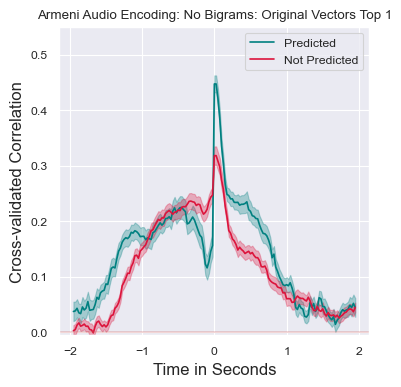

In [33]:
# get model names
from lingpred_new.plotting import times_100, lowerCI, upperCI, reshape

models = ['Top 1', 'Not Predicted']
labels = ['Predicted', 'Not Predicted']
    
    
fig, (ax1) = plt.subplots(1, 1, figsize=(4, 4))

for i, key in enumerate([encoding_Glove_top_1, encoding_Glove_not_top_1]):
    ax1.plot(times_100, key.mean(axis=0).mean(axis=0), c=colours[models[i]], label=labels[i])   
    ax1.fill_between(times_100, lowerCI(reshape(key)), 
                                upperCI(reshape(key)), color=colours[models[i]], alpha=0.3)

ax1.legend()
ax1.set_ylim([-0.005, 0.55])
ax1.set_xlabel('Time in Seconds', fontsize=12)
ax1.set_ylabel('Cross-validated Correlation', fontsize=12)
ax1.axhline(c='indianred',  alpha=0.3)
ax1.set_title(dataset+' Audio Encoding: No Bigrams: Original Vectors ' + models[0])

Text(0.5, 1.0, 'Armeni Audio Encoding: No Bigrams: Original Vectors Top 5')

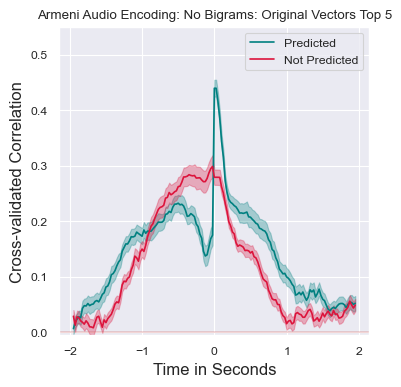

In [34]:
models = ['Top 5', 'Not Predicted']
labels = ['Predicted', 'Not Predicted']
    
    
fig, (ax1) = plt.subplots(1, 1, figsize=(4, 4))

for i, key in enumerate([encoding_Glove_top_5, encoding_Glove_not_top_5]):
    ax1.plot(times_100, key.mean(axis=0).mean(axis=0), c=colours[models[i]], label=labels[i])   
    ax1.fill_between(times_100, lowerCI(reshape(key)), 
                                upperCI(reshape(key)), color=colours[models[i]], alpha=0.3)

ax1.legend()
ax1.set_ylim([-0.005, 0.55])
ax1.set_xlabel('Time in Seconds', fontsize=12)
ax1.set_ylabel('Cross-validated Correlation', fontsize=12)
ax1.axhline(c='indianred',  alpha=0.3)
ax1.set_title(dataset+' Audio Encoding: No Bigrams: Original Vectors ' + models[0])

Text(0.5, 1.0, 'Armeni Audio Encoding: No Bigrams: Residual Vectors Top 1')

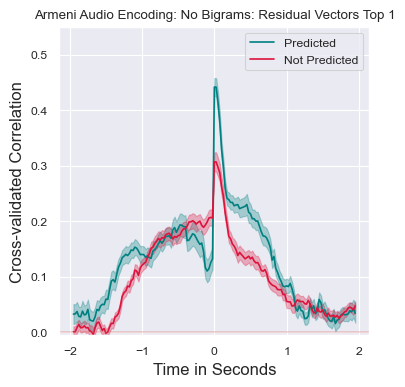

In [42]:

models = ['Top 1', 'Not Predicted']
labels = ['Predicted', 'Not Predicted']
    
    
fig, (ax1) = plt.subplots(1, 1, figsize=(4, 4))

for i, key in enumerate([encoding_Glove_residualised_top_1, encoding_Glove_residualised_not_top_1]):
    ax1.plot(times_100, key.mean(axis=0).mean(axis=0), c=colours[models[i]], label=labels[i])   
    ax1.fill_between(times_100, lowerCI(reshape(key)), 
                                upperCI(reshape(key)), color=colours[models[i]], alpha=0.3)

ax1.legend()
ax1.set_ylim([-0.005, 0.55])
ax1.set_xlabel('Time in Seconds', fontsize=12)
ax1.set_ylabel('Cross-validated Correlation', fontsize=12)
ax1.axhline(c='indianred',  alpha=0.3)
ax1.set_title(dataset+' Audio Encoding: No Bigrams: Residual Vectors ' + models[0])

Text(0.5, 1.0, 'Armeni Audio Encoding: No Bigrams: Residual Vectors Top 5')

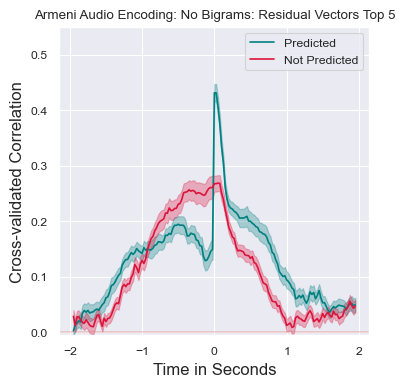

In [43]:

models = ['Top 5', 'Not Predicted']
labels = ['Predicted', 'Not Predicted']
    
    
fig, (ax1) = plt.subplots(1, 1, figsize=(4, 4))

for i, key in enumerate([encoding_Glove_residualised_top_5, encoding_Glove_residualised_not_top_5]):
    ax1.plot(times_100, key.mean(axis=0).mean(axis=0), c=colours[models[i]], label=labels[i])   
    ax1.fill_between(times_100, lowerCI(reshape(key)), 
                                upperCI(reshape(key)), color=colours[models[i]], alpha=0.3)

ax1.legend()
ax1.set_ylim([-0.005, 0.55])
ax1.set_xlabel('Time in Seconds', fontsize=12)
ax1.set_ylabel('Cross-validated Correlation', fontsize=12)
ax1.axhline(c='indianred',  alpha=0.3)
ax1.set_title(dataset+' Audio Encoding: No Bigrams: Residual Vectors ' + models[0])